<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-single-cell-tracks" data-toc-modified-id="Analyze-single-cell-tracks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze single cell tracks</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Setup</a></span></li></ul></li><li><span><a href="#Analyse-single-data-set" data-toc-modified-id="Analyse-single-data-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analyse single data set</a></span><ul class="toc-item"><li><span><a href="#Plot-cell-tracks" data-toc-modified-id="Plot-cell-tracks-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot cell tracks</a></span></li><li><span><a href="#Net-displacement-angle" data-toc-modified-id="Net-displacement-angle-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Net displacement angle</a></span></li><li><span><a href="#Number-of-cell-tracks-over-time" data-toc-modified-id="Number-of-cell-tracks-over-time-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Number of cell tracks over time</a></span></li><li><span><a href="#MSD" data-toc-modified-id="MSD-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>MSD</a></span></li><li><span><a href="#Compute-speed-and-persistence" data-toc-modified-id="Compute-speed-and-persistence-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Compute speed and persistence</a></span></li><li><span><a href="#Instantaneous-speeds" data-toc-modified-id="Instantaneous-speeds-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Instantaneous speeds</a></span></li><li><span><a href="#Persistence" data-toc-modified-id="Persistence-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Persistence</a></span></li><li><span><a href="#Velocity-autocorrelation-function" data-toc-modified-id="Velocity-autocorrelation-function-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Velocity autocorrelation function</a></span></li><li><span><a href="#Pairwise-distances" data-toc-modified-id="Pairwise-distances-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Pairwise distances</a></span><ul class="toc-item"><li><span><a href="#Nearest-neighbour-distances" data-toc-modified-id="Nearest-neighbour-distances-1.1.9.1"><span class="toc-item-num">1.1.9.1&nbsp;&nbsp;</span>Nearest neighbour distances</a></span></li></ul></li><li><span><a href="#Spatial-correlations" data-toc-modified-id="Spatial-correlations-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Spatial correlations</a></span></li></ul></li></ul></li></ul></div>

# Analyze single cell tracks

Analyze cell motility for the BAPN E14.0 images, which seem to show aberrant cell motion. Input data consists of manually tracked xy-positions of individual cells.

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import ceil
import seaborn as sns
from skimage import io

# For significance analysis
from scipy import stats
import statsmodels as sm
from statsmodels.formula.api import ols

cwd = os.getcwd(); print("Working dir: " + cwd)

folder_figures = "/Users/dang/Documents/Projects/Tabler_skull/Figures/temp/";
im_label = "Cell_tracks_analyzed_"

Working dir: /Users/yitengdang/Documents/Projects/Tabler_skull/Scripts/Scripts_image_analysis


Images for cell tracking:
* /Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/211223 BAPN E14.0 live imaging/MaxProjected_Stitched_dataset_flipped.tif
* /Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/221114 BAPN E14.0 live imaging/originals/MaxProjected_Stitched_1_TiffConverted.tif

# Analyse relative interface displacements

## Load interface data (from full movies)

In [14]:
## WT movies
load_folder = '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Original datasets/'
folders_WT = [load_folder, load_folder, load_folder, load_folder]

fname_load_all = ["190305 Live Imaging/MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1(0-12hr).tif",
            "190314 Live Imaging/MaxProjected_Stitched_190314 ML1 OsxGFP Explant Video 1 (0-16hr).tif",
            "200120 Live Imaging/MaxProjected_Stitched_200120 Live Imaging OsxGFP E1375 12 hours.tif",
            "170902 Live Imaging/MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging_cropped.tif"]

fnames_in_all_WT = [os.path.join( folders_WT[i], fname_load_all[i] ) for i in range(len(folders_WT))];

fname_ids_WT = ["Video1_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)",
                   "Video2_MaxProjected_Stitched_Blurred_190314 ML1 OsxGFP Explant (0-8hr)",
                   "Video3_MaxProjected_Stitched_Blurred_200120 Live Imaging OsxGFP E1375 12 hours",
                   "Video4_MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging_cropped"]

# Video properties
# number of pixels per micron
pix_per_micron_all_WT = [4.400, 5.1040, 5.1040, 4.4034];

# total size of image in pixels
size_px_all_WT = np.array([[3782, 2882], [5612, 2850], [4734, 3925], [4643, 2886]]);
# size = np.array([859.55, 655]); # 190305
# size = np.array([1099.53, 562.5]); # 190314
# size = np.array([927.51, 769.01]); # 200120
# size = np.array([4643, 2886])/pix_per_micron; # 200120

# bounds for filtering interfaces
lower_all_WT = [50, 50, 700, 50]  
upper_all_WT = [-200, -200, -150, -150];

In [15]:
## Load WT images
images_ctrl = [];

for j in range(len(fnames_in_all)):
    image = io.imread(fnames_in_all[j])
    image = image[:, lower_all[j]:upper_all[j], :]
    images_ctrl.append(image)
    print(image.shape)

# flip images of video 2
for t_idx in range( images_ctrl[1].shape[0] ):
    images_ctrl[1][t_idx] = np.fliplr(images_ctrl[1][t_idx]);

(73, 2632, 3782)
(98, 2630, 5612)
(73, 3075, 4734)
(85, 2635, 4643)


In [29]:
## Choose images to plot / analyse
# images_all = images_bapn;
images_all = images_ctrl;

## Other vars
fname_ids = fname_ids_WT
fnames_in_all = fnames_in_all_WT
pix_per_micron_all = pix_per_micron_all_WT
size_px_all = size_px_all_WT
lower_all = lower_all_WT
upper_all = upper_all_WT

# fname_ids = fname_ids_BAPN
# fnames_in_all = fnames_in_all_BAPN
# pix_per_micron_all = pix_per_micron_all_BAPN
# size_px_all = size_px_all_BAPN
# lower_all = lower_all_BAPN
# upper_all = upper_all_BAPN

In [36]:
## Obtain interfaces
interface_data_all = []

for j in range(len(images_all)):
    #np.mean(images_bapn[j][0, :, :], axis=0)
    interface_data = np.mean(images_all[j][:, :, :], axis=1) #.shape;
    interface_data_all.append( interface_data ) # scale data by resolution


### Plot interfaces

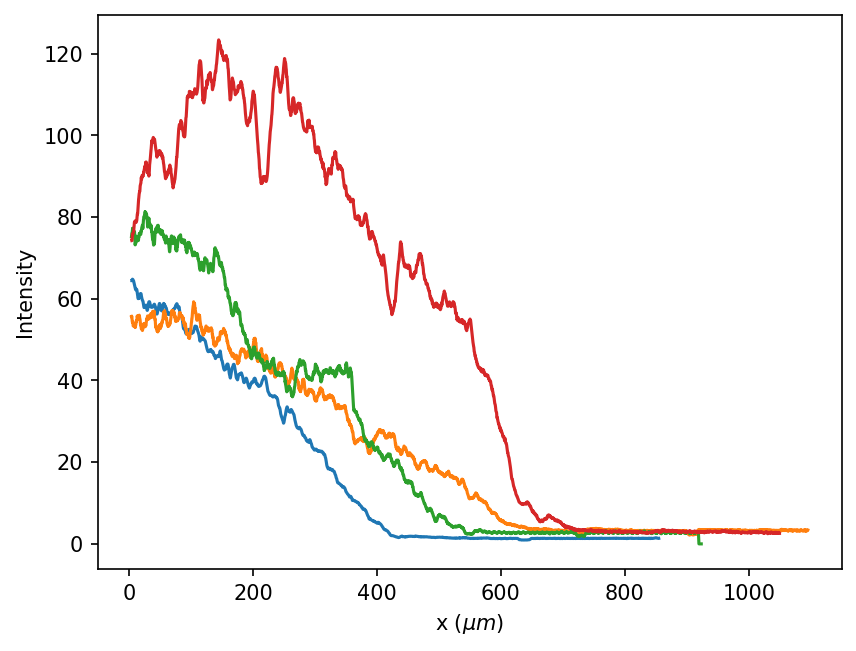

In [37]:
## Plot interfaces
## Trim ends
x_lb = 20; 
x_ub = -20; 

t_idx = 0;

plt.figure(dpi=150);
for j in range(len(pix_per_micron_all)):
    x_data = np.arange( interface_data_all[j].shape[-1] )/pix_per_micron_all[j]
    #x_data = np.arange( images_all[j].shape[-1] )/pix_per_micron_all[j]
    #plt.plot(x_data, plot_data[j])
    plt.plot(x_data[x_lb:x_ub], interface_data_all[j][t_idx, x_lb:x_ub] )
#plt.legend(fname_ids)
plt.xlabel('x ($\mu m$)')
plt.ylabel('Intensity')    
plt.show()

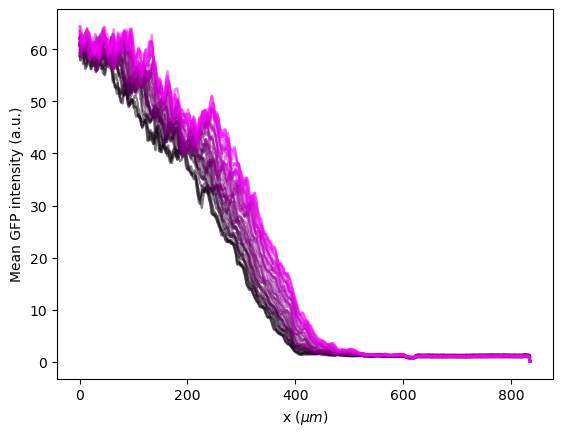

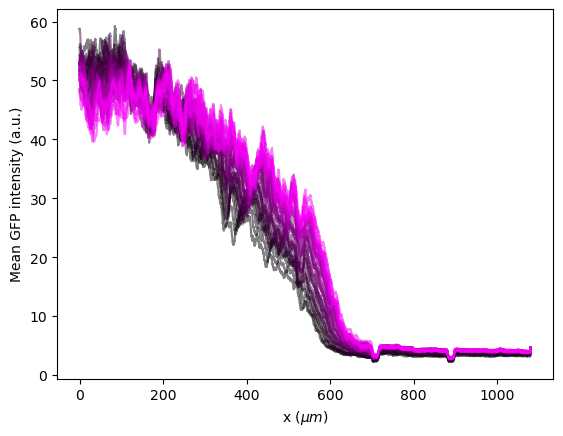

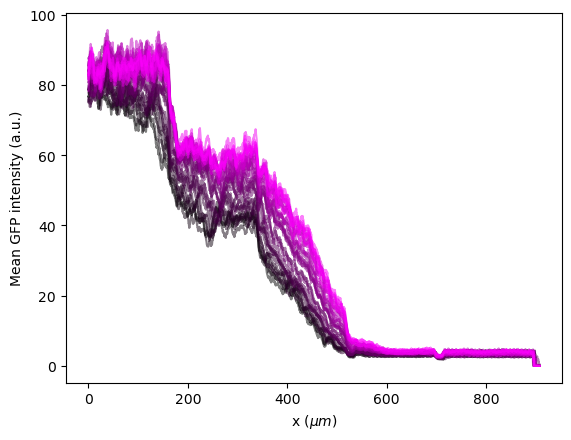

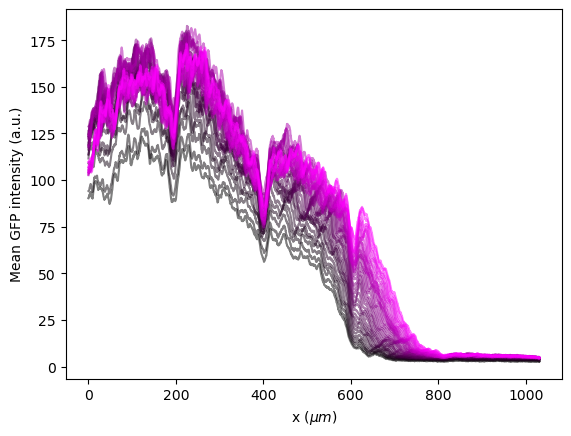

In [56]:
## Profile over times
for i in range(len(images_all)):
    # image=images_all[i]
    #fname_id = fname_ids[i]
    interface_data = interface_data_all[i]
    
    x_lb = 100;
    x_ub = -1;
    #y_lb = 0;
    #y_ub = -1;
    t_selected = np.arange(0, 37)
    #t_selected = np.arange(0, image.shape[0])

    interface_data = interface_data[:, x_lb:x_ub]
    x_data = np.arange( interface_data.shape[1] )/pix_per_micron_all[i]
    
    plt.figure( dpi=100); # figsize=(8, 6),
    for i in range(len(t_selected)):
        ti = t_selected[i]
        
        plt.plot(x_data, interface_data[ti, :], color=[ti/np.max(t_selected), 0, ti/np.max(t_selected), 0.5] );
        
        plt.xlabel('x ($\mu m$)')
        plt.ylabel('Mean GFP intensity (a.u.)')
        
        #save_fname = fname_id + '_intensity_profiles_magenta_tmax_6hrs_x_lb_'+str(x_lb)+'_x_ub'+str(x_ub)+'.pdf';
        #plt.savefig( os.path.join(save_folder, save_fname) )
    
    plt.show()

## Shifted interfaces relative to front cell positions

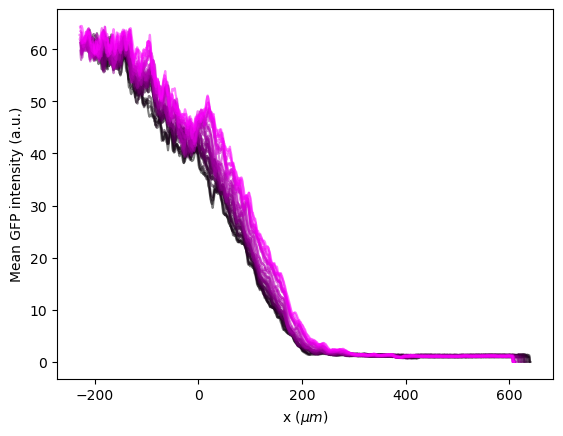

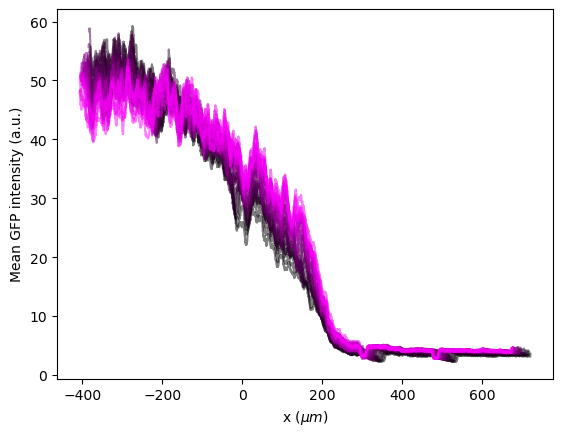

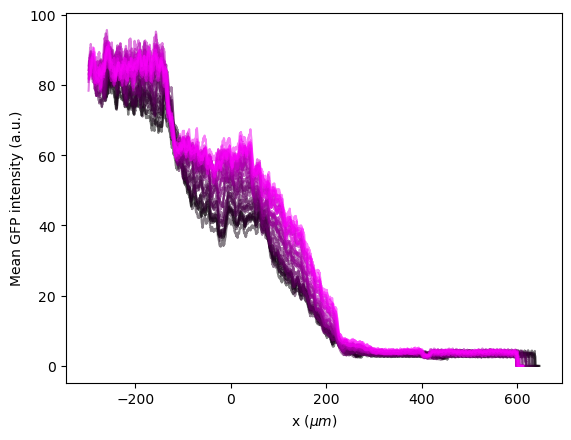

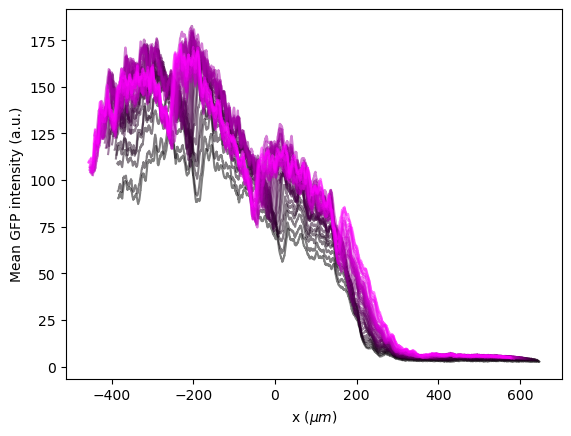

In [63]:
## Plot shifted profiles
for i in range(len(interface_data_all)):
    interface_data = interface_data_all[i]

    x_lb = 100;
    x_ub = -1;
    t_selected = np.arange(0, 37)
    x_data_t0 = np.arange( interface_data.shape[1] )/pix_per_micron_all[i]
    
    plt.figure( dpi=100); 
    for j in range(len(t_selected)):
        ti = t_selected[j]
        
        plt.plot(x_data_t0[x_lb:x_ub]-X_avg_all[i, ti], interface_data[ti, x_lb:x_ub], color=[ti/np.max(t_selected), 0, ti/np.max(t_selected), 0.5] );
            
        plt.xlabel('x ($\mu m$)')
        plt.ylabel('Mean GFP intensity (a.u.)')    


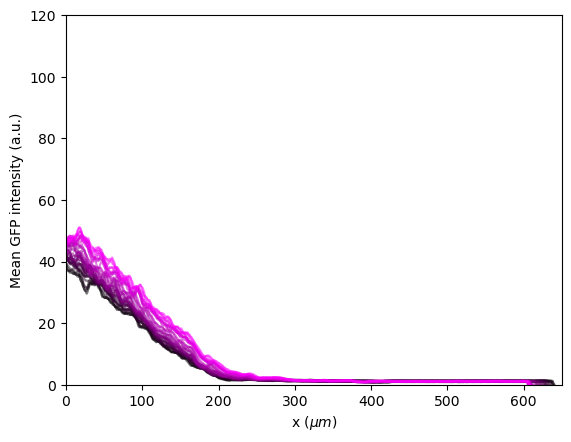

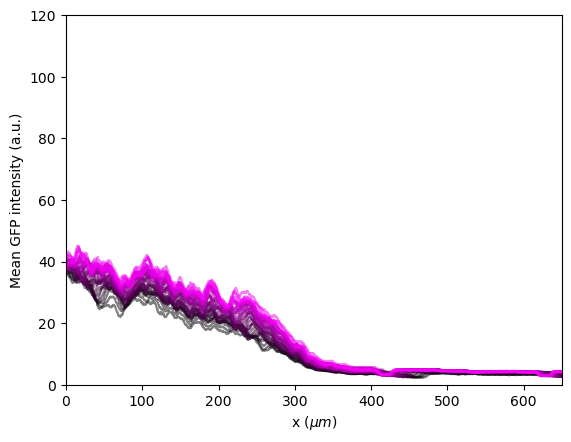

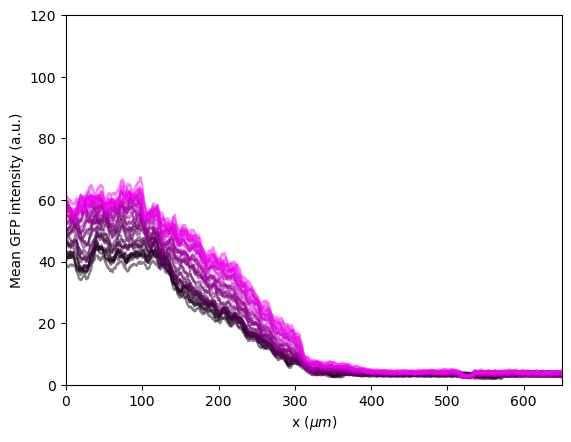

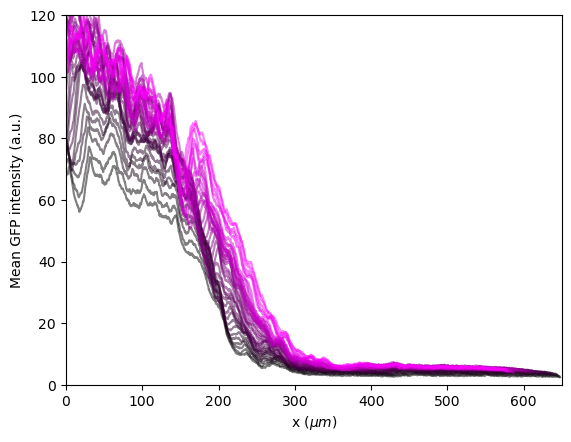

In [66]:
## Plot shifted profiles only ahead of front
for i in range(len(images_all)):
    interface_data = interface_data_all[i]
    
    t_selected = np.arange(0, 37)
    x_data_t0 = np.arange( interface_data.shape[1] )/pix_per_micron
    
    plt.figure( dpi=100); 
    for j in range(len(t_selected)):
        ti = t_selected[j]
        
        plt.plot(x_data_t0-X_avg_all[i, ti], interface_data[ti, :], color=[ti/np.max(t_selected), 0, ti/np.max(t_selected), 0.5] );
            
        plt.xlabel('x ($\mu m$)')
        plt.ylabel('Mean GFP intensity (a.u.)')    

    plt.xlim(0, 650)
    plt.ylim(0, 120)

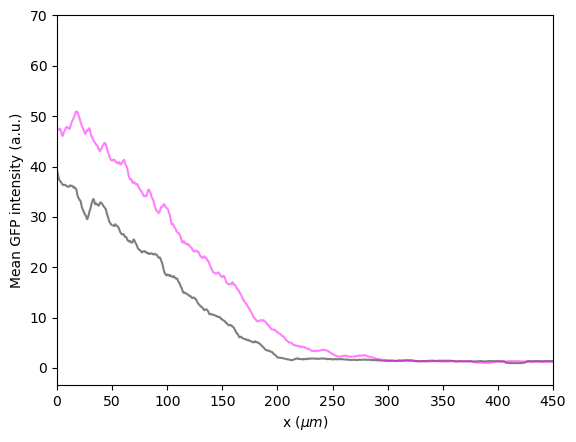

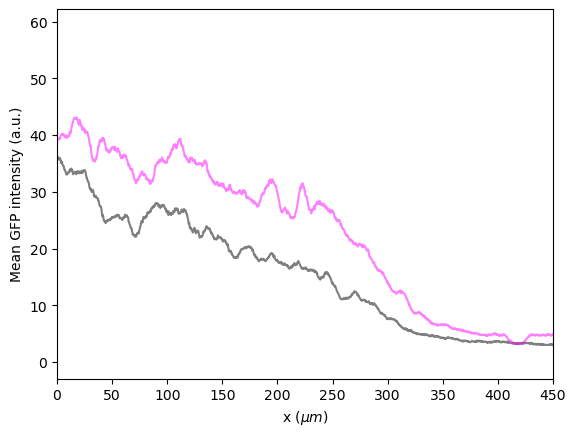

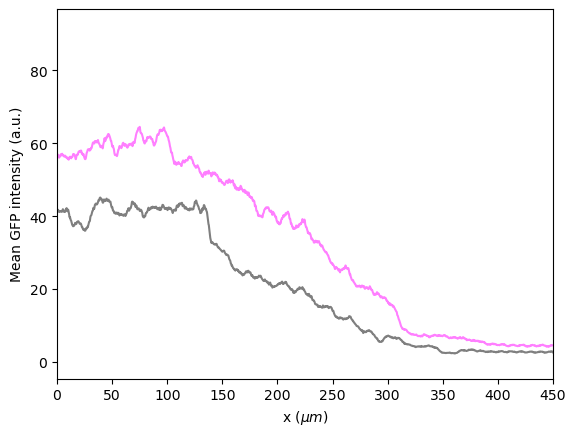

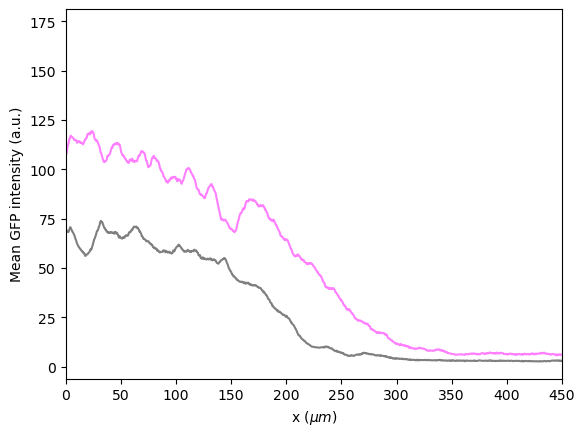

In [71]:
## Plot shifted profiles only ahead of front - compare T=0 and T=final
for i in range(len(images_all)):
    interface_data = interface_data_all[i]
    
    t_selected = [0, 36]
    x_data_t0 = np.arange( interface_data.shape[1] )/pix_per_micron
    
    plt.figure( dpi=100); 
    for j in range(len(t_selected)):
        ti = t_selected[j]
        
        plt.plot(x_data_t0-X_avg_all[i, ti], interface_data[ti, :], color=[ti/np.max(t_selected), 0, ti/np.max(t_selected), 0.5] );
            
        plt.xlabel('x ($\mu m$)')
        plt.ylabel('Mean GFP intensity (a.u.)')    

    plt.xlim(0, 450)
    #plt.ylim(500, 1000)

In [ ]:
## To do: compute difference between graphs and plot